# Decision Tree

## create and pruning a decision tree

purity and information entropy

$$ Entropy(t) = - \sum p(t)log_2 p(t) $$

pre pruning and post pruning

In [1]:
import sklearn
import seaborn as sns

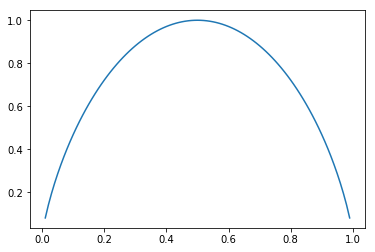

In [2]:
# entropy figure
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0.01,1,0.01)
y=-x*np.log2(x)-(1-x)*np.log2(1-x)
plt.plot(x, y)
plt.show()

In [3]:
# entropy
x = np.array([6,9])
entropy = lambda x:-np.sum([j*np.log2(j) for j in [i/np.sum(x) for i in x]])
print("{:.3}".format(entropy(x)))

0.971


## Prepare data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris=load_iris()
features = iris.data
labels = iris.target
# random split 33% to test dataset
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=0)

## ID3
Information Gain
$$ Gain(D,a) = Entropy(D) - \sum_{i=1}^k \frac{|D_i|}{|D|}Entropy(D_i) $$
$D$ is parent node, $D_i$ is child node, $a$ is selected feature

## C4.5
Information Gain Ratio
$$ IGR(D,a) = Gain(D,a)/Entropy(a) $$

## CART
Classification And Regression Tree

Use gini for classification, use mean variance MSE(Mean Squared Error) for regression
$$ Gini(t) = 1 - \sum_k [p(C_k|t)]^2 $$
for binary classification k = 2
$$ Gini(p) = 2p(1-p) $$
$$ Gini(D,a) = \frac{D_1}{D} Gini(D_1) + \frac{D_2}{D} Gini(D_2) $$

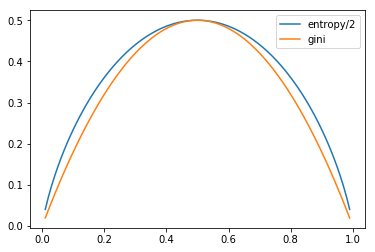

In [5]:
# gini vs entropy figure
x=np.arange(0.01,1,0.01)
g=2*x*(1-x)
e=-x*np.log2(x)-(1-x)*np.log2(1-x)
plt.plot(x, e/2)
plt.plot(x, g)
plt.legend(['entropy/2','gini'])
plt.show()

### Classification Tree

In [6]:
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(train_features, train_labels)
test_predict = clf.predict(test_features)
score = accuracy_score(test_labels, test_predict)
print("CART accuracy %.4lf" % score)

CART accuracy 0.9800


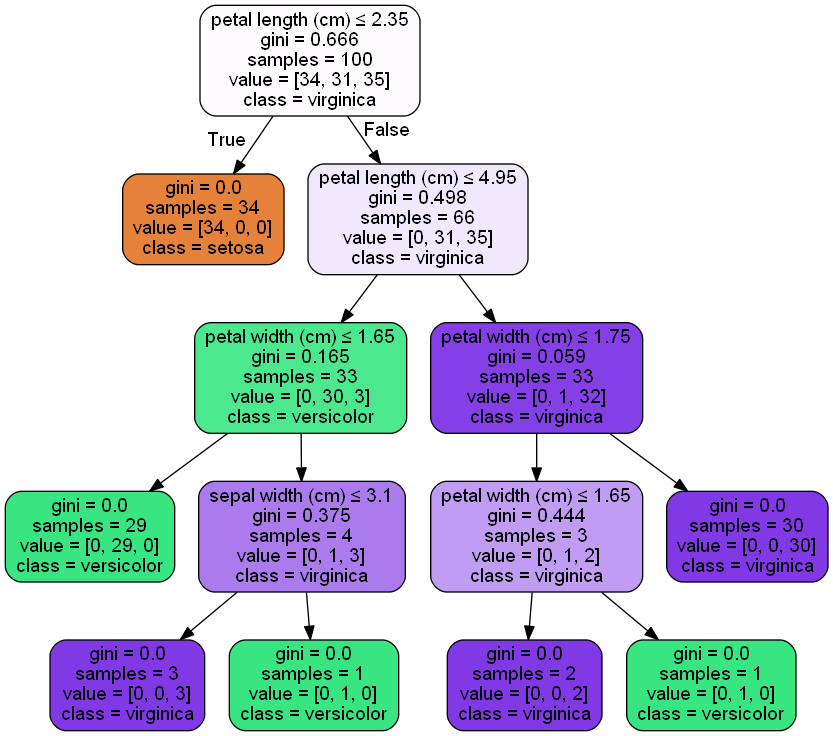

In [7]:
# display graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Regression Tree

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
# Prepare data
boston=load_boston()
features = boston.data
prices = boston.target
train_features, test_features, train_price, test_price = train_test_split(features, prices, test_size=0.33)

In [9]:
dtr=DecisionTreeRegressor()
dtr.fit(train_features, train_price)
predict_price = dtr.predict(test_features)
print('rt LSD:', mean_squared_error(test_price, predict_price))
print('rt LAD:', mean_absolute_error(test_price, predict_price)) 

rt LSD: 35.31041916167665
rt LAD: 3.481437125748503


### digits dataset

In [10]:
from sklearn.datasets import load_digits
digits=load_digits()
features=digits.data
labels=digits.target
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.33,random_state=0)

clf=DecisionTreeClassifier(criterion='gini')
clf=clf.fit(train_features,train_labels)
test_predict=clf.predict(test_features)
score=accuracy_score(test_labels,test_predict)
print("CART digits accuracy %.4lf"%score)

CART digits accuracy 0.8586


In [11]:
# graphviz output to file
dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("digits.pdf")

True